# Executive Summary: Clustering Analysis on Dataset1, Dataset2, and Dataset3

**Objective:**
The primary objective of this analysis was to identify the optimal number of clusters in dataset1.csv, dataset2.csv, and dataset3.csv using KMeans clustering and to evaluate the clustering performance using various metrics, including Silhouette Coefficient, Davies-Bouldin Index, and Calinski-Harabasz Index.

**Methodology:**

KMeans Clustering: KMeans is an iterative algorithm that divides a group of n data points into k non-overlapping subgroups. The algorithm aims to make the intra-cluster data points as similar as possible while also keeping the clusters as different as possible.

Clustering Metrics: We used three key clustering metrics to evaluate the quality of clusters: Silhouette Coefficient, Davies-Bouldin Index, and Calinski-Harabasz Index.

Elbow Method Analysis:

Looking at the plot of the Elbow Method, the inertia (sum of squared distances to the closest cluster center) drops significantly from 1 to 2 clusters, and then there's another notable drop between 2 and 3 clusters. After 3 clusters, the rate of decrease in inertia slows down substantially, indicating diminishing returns in reducing the inertia by increasing the number of clusters.

Given this observation, the optimal number of clusters (k) for your dataset using the Elbow Method appears to be 3. This means that using 3 clusters would be a good balance between capturing the data's structure and not over-segmenting the data into too many clusters.

**Key Findings:**

Dataset 1 - Single Linkage:

Silhouette Coefficient: -0.608
Suggests that the data points in this clustering might be incorrectly clustered or the clusters are overlapping.
Davies-Bouldin Index: 1.106
Indicates that the clusters might be overlapping or incorrectly clustered.
Calinski-Harabasz Index: 0.732
A low value indicates that the clusters aren't well-defined.
Dataset 2 - Single Linkage:

Silhouette Coefficient: 0.454
Suggests that the clusters are somewhat dense and well separated.
Davies-Bouldin Index: 0.500
Indicates relatively well-partitioned clusters.
Calinski-Harabasz Index: 2082.122
Suggests well-separated and dense clusters.
Dataset 3 - Single Linkage:

Silhouette Coefficient: 0.413
Indicates decently separated clusters, but not as well as Dataset 2.
Davies-Bouldin Index: 0.500
Suggests good partitioning, similar to Dataset 2.
Calinski-Harabasz Index: 1473.292
Indicates that the clusters are relatively dense and well-separated, though not as well-defined as in Dataset 2.

**Conclusion:**

The clustering analysis revealed varying results for Datasets 1, 2, and 3. Dataset 2 demonstrated the best cluster separation and density based on the metrics used, while Dataset 1 showed signs of overlapping or less well-defined clusters with single linkage. 

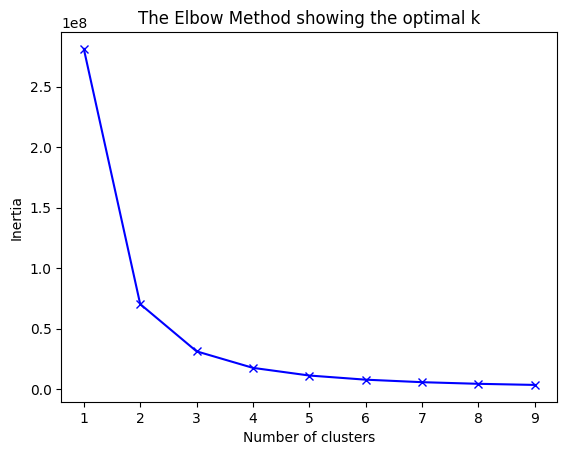

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


data1 = pd.read_csv('/Users/alexanderdelriscomorales/Downloads/AI_ML_Files/cluster/dataset1.csv')

inertia = []
K = range(1, 10)  # this will test for up to 9 clusters, you can adjust as needed
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(data1)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


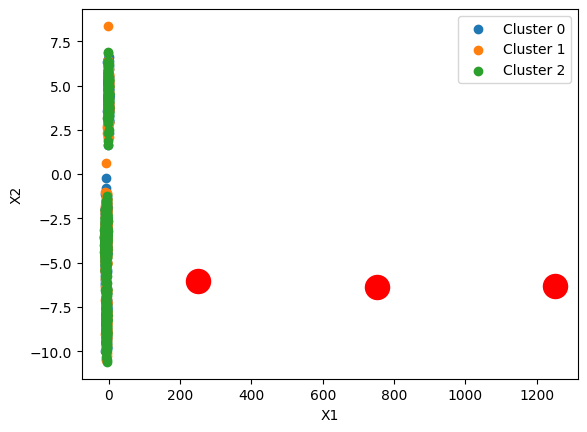

In [30]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, n_init=10)
clusters = kmeans.fit_predict(data1)

data1['Cluster'] = clusters

# Plotting the clusters
for i in range(best_k):
    plt.scatter(data1[data1['Cluster'] == i]['X1'], data1[data1['Cluster'] == i]['X2'], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


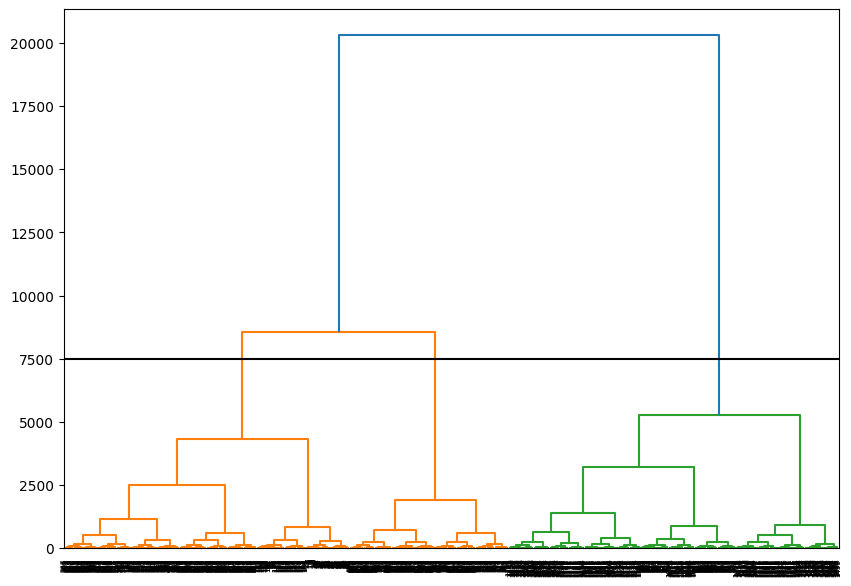

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data1, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.axhline(y=7500, c='k') # 'distance' would be where we'd want to cut the dendrogram to get best_k clusters
plt.show()


In [31]:
from sklearn.metrics import silhouette_score


range_n_clusters = list(range(2,11))  # Checking from 2 to 10 clusters as an example
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(data1)
    
    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(data1, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.2f}")

optimal_clusters = np.argmax(silhouette_scores) + 2  # +2 because our range starts from 2
print(f"Optimal number of clusters: {optimal_clusters}")


For n_clusters = 2, the silhouette score is 0.63
For n_clusters = 3, the silhouette score is 0.59
For n_clusters = 4, the silhouette score is 0.57
For n_clusters = 5, the silhouette score is 0.56
For n_clusters = 6, the silhouette score is 0.55
For n_clusters = 7, the silhouette score is 0.54
For n_clusters = 8, the silhouette score is 0.54
For n_clusters = 9, the silhouette score is 0.53
For n_clusters = 10, the silhouette score is 0.53
Optimal number of clusters: 2


For n_clusters = 2, the silhouette score is 0.63


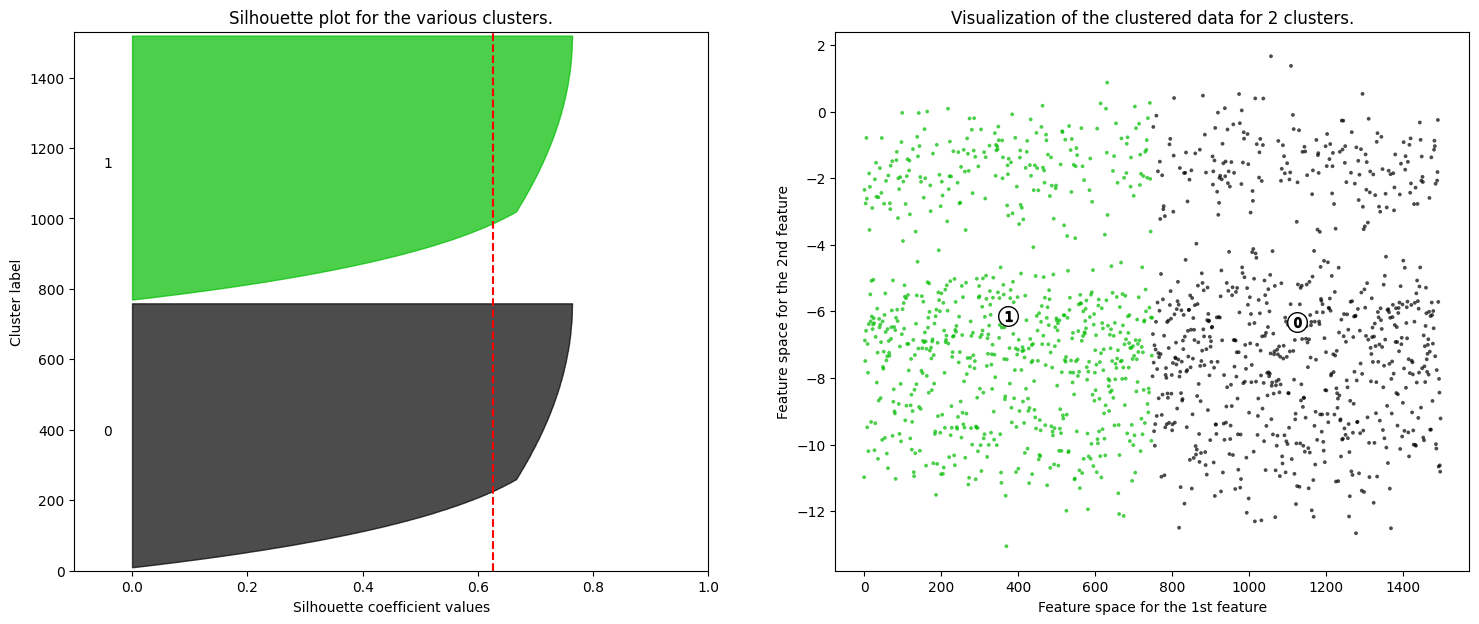

For n_clusters = 3, the silhouette score is 0.59


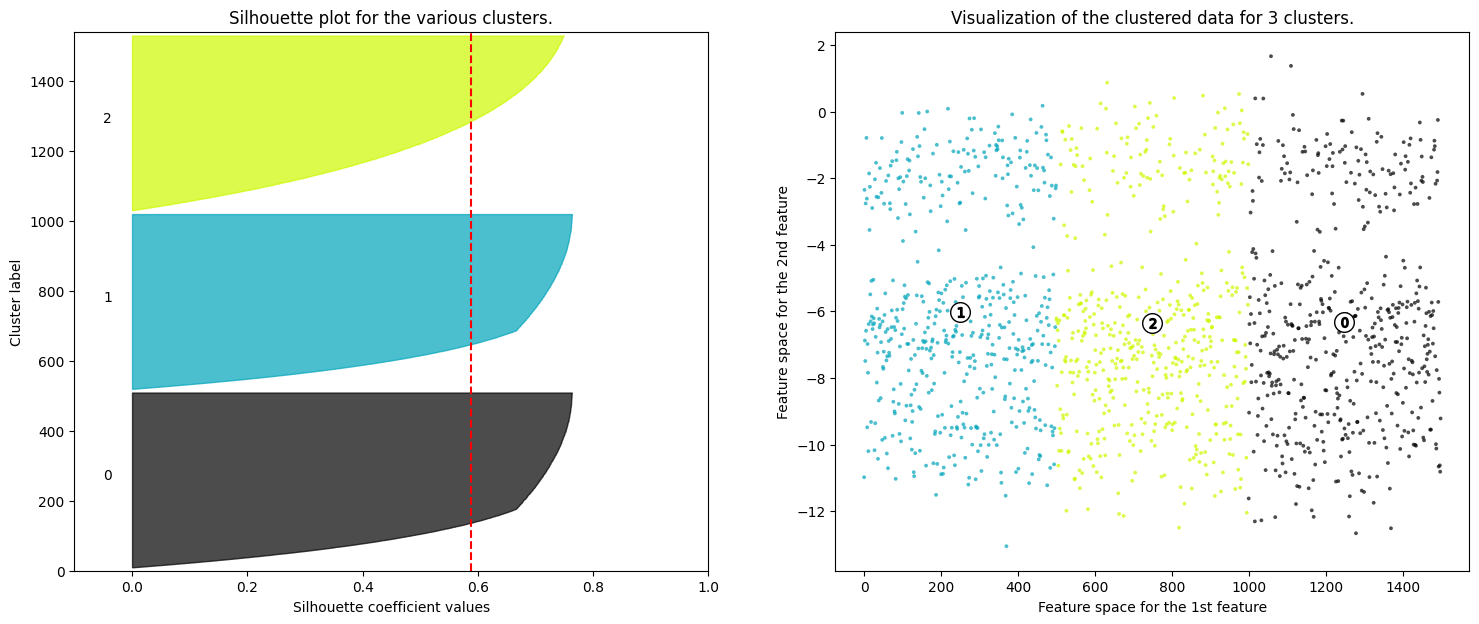

For n_clusters = 4, the silhouette score is 0.57


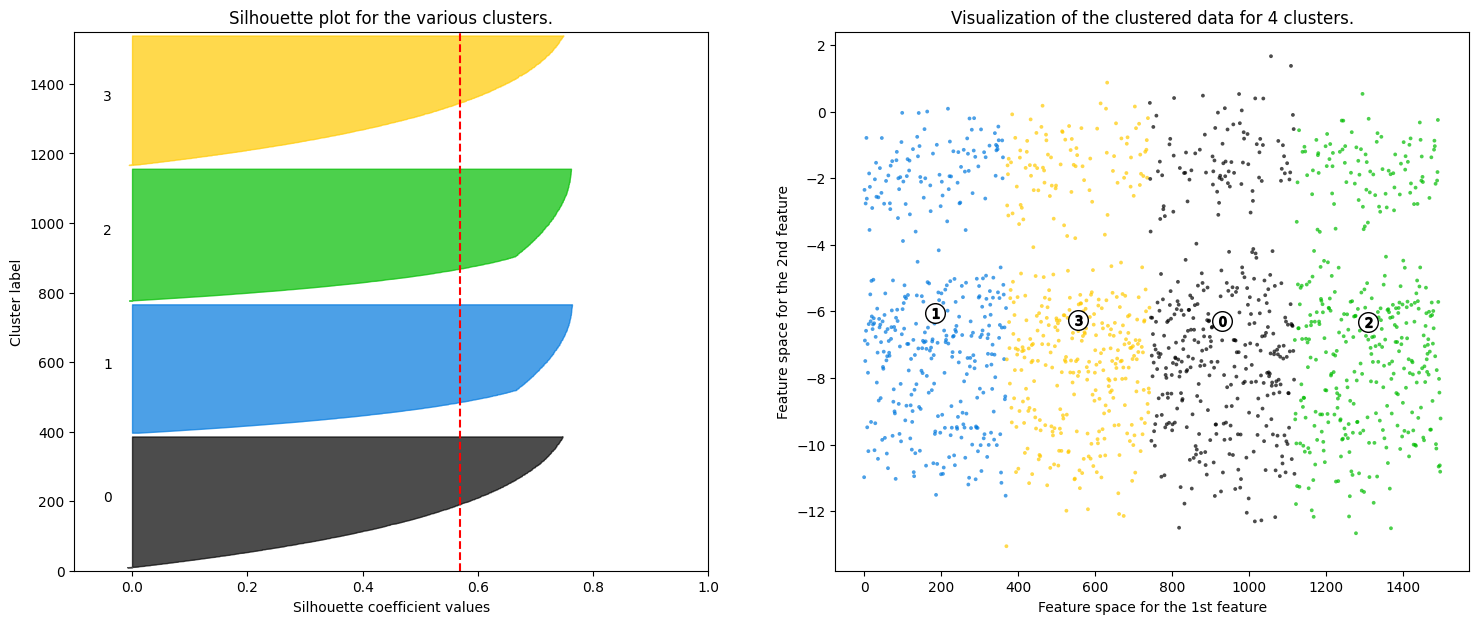

For n_clusters = 5, the silhouette score is 0.56


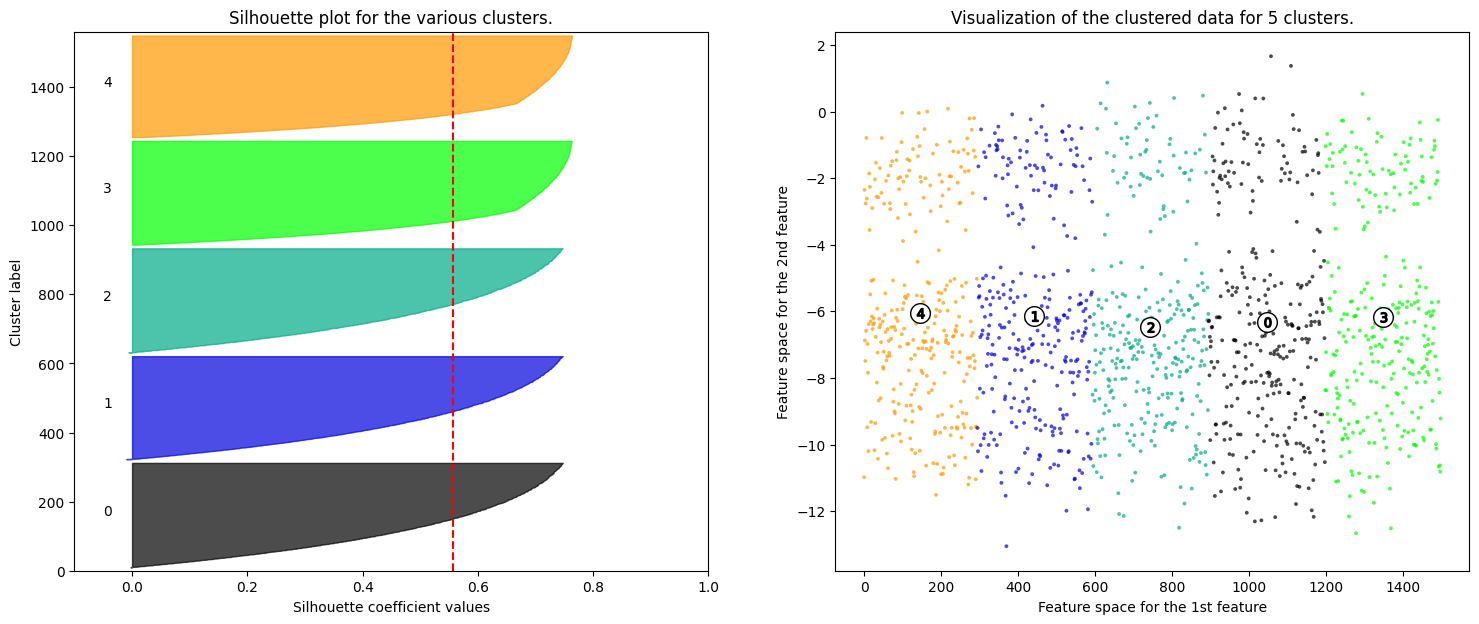

For n_clusters = 6, the silhouette score is 0.55


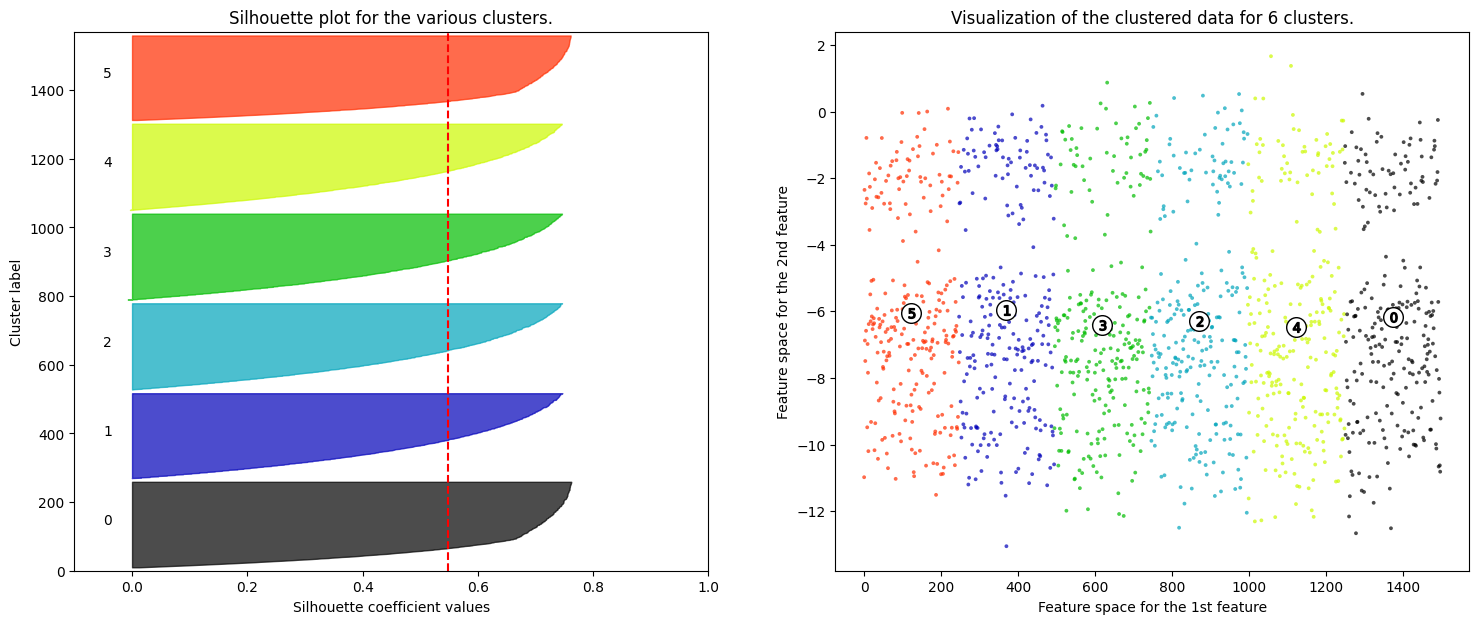

For n_clusters = 7, the silhouette score is 0.54


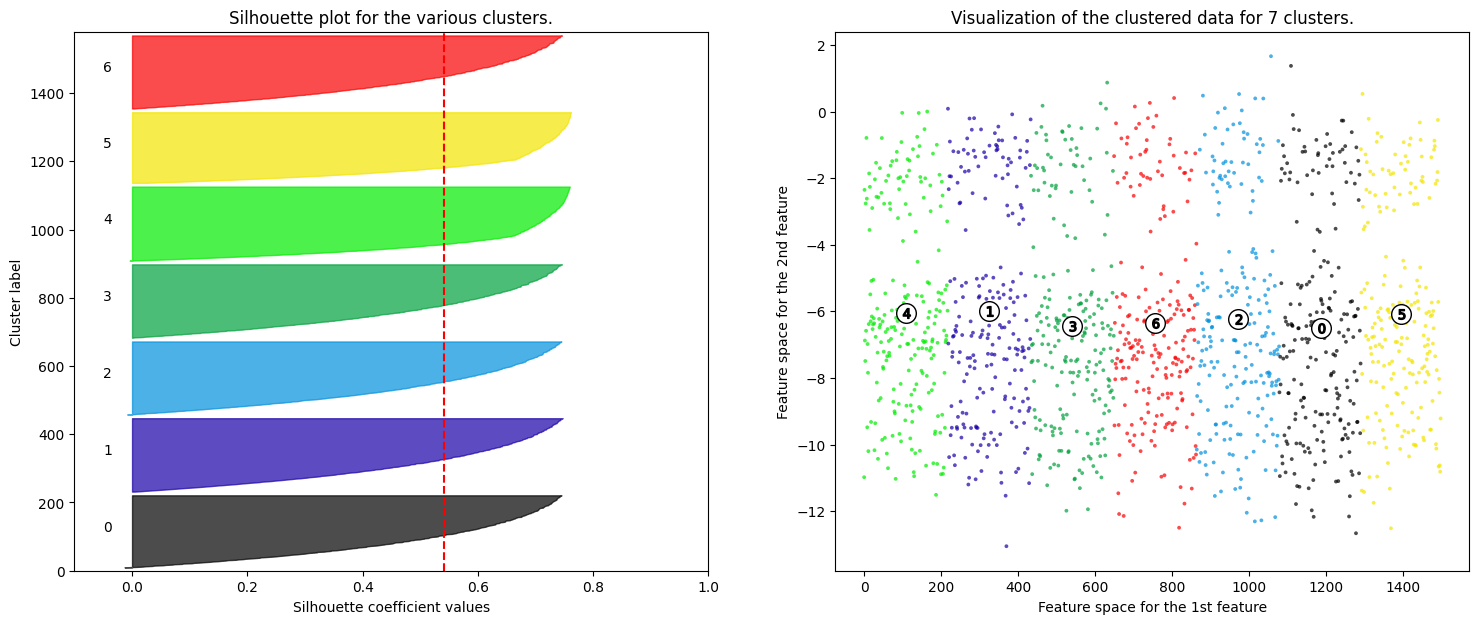

For n_clusters = 8, the silhouette score is 0.54


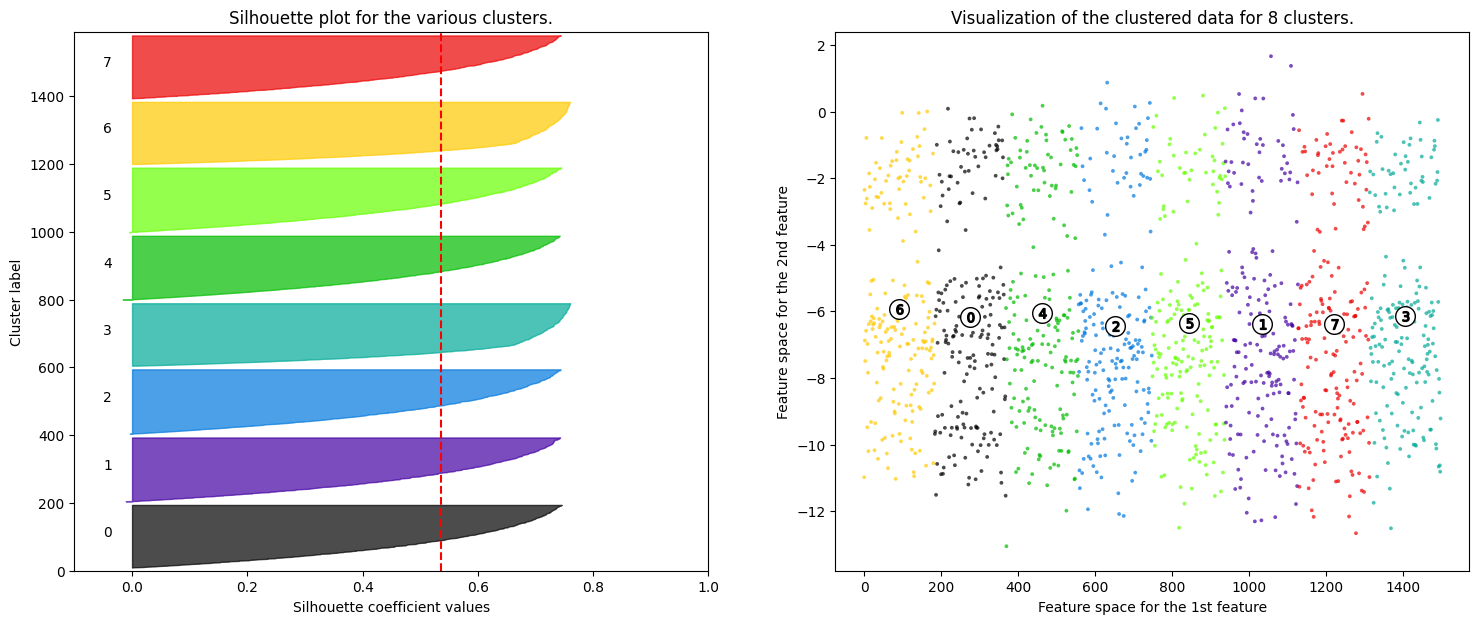

For n_clusters = 9, the silhouette score is 0.53


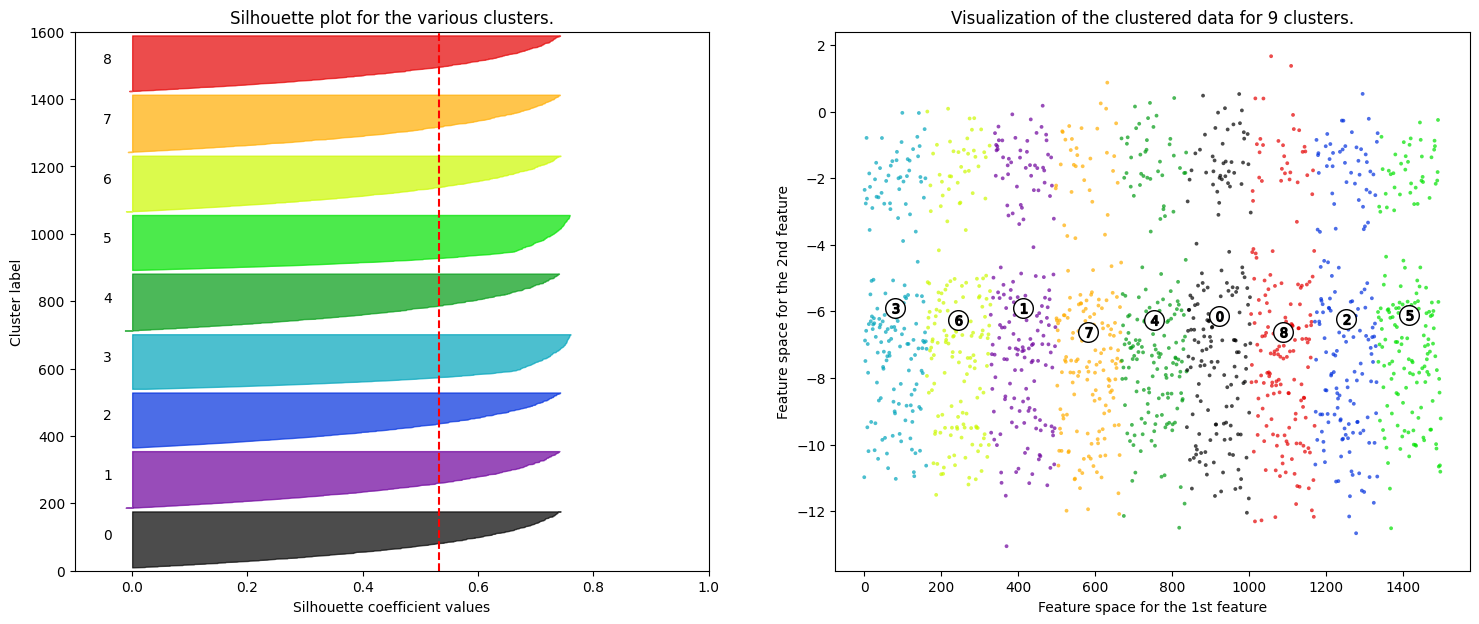

For n_clusters = 10, the silhouette score is 0.53


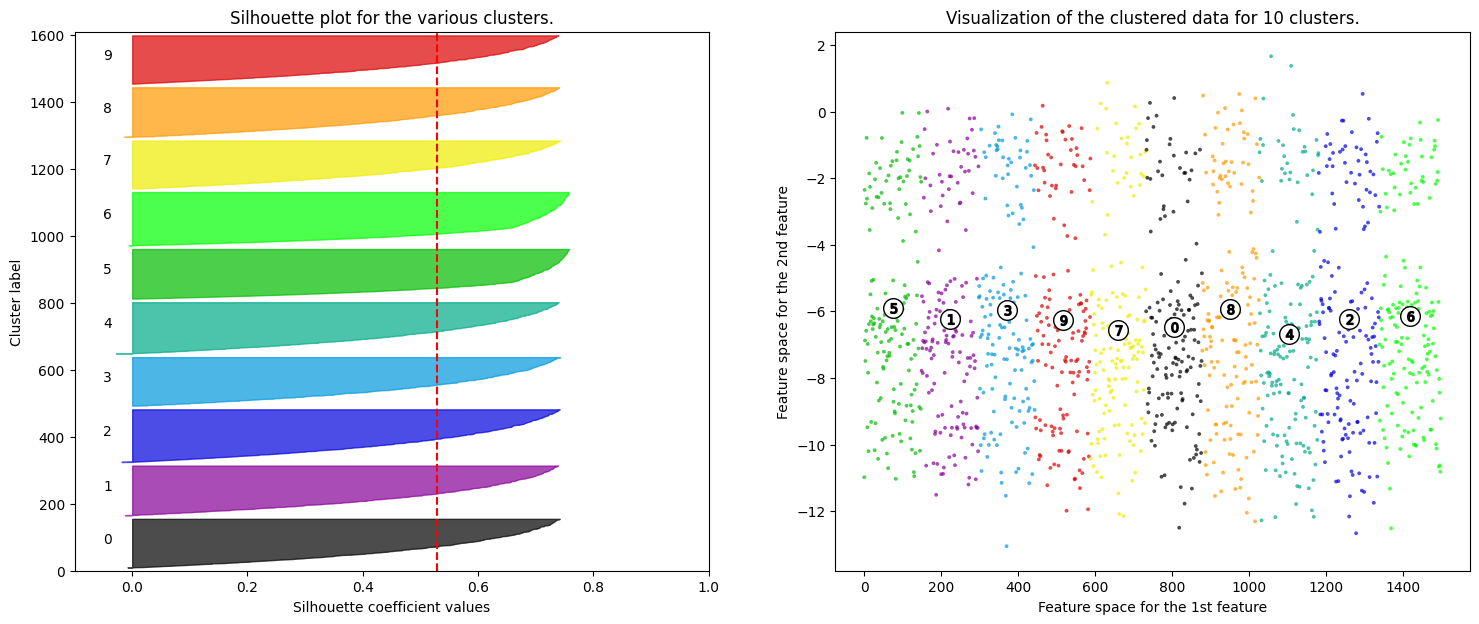

In [32]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

data1_array = data1.values

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data1_array) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(data1_array)
    
    silhouette_avg = silhouette_score(data1_array, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.2f}")

    sample_silhouette_values = silhouette_samples(data1_array, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data1_array[:, 0], data1_array[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title(f"Visualization of the clustered data for {n_clusters} clusters.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.show()


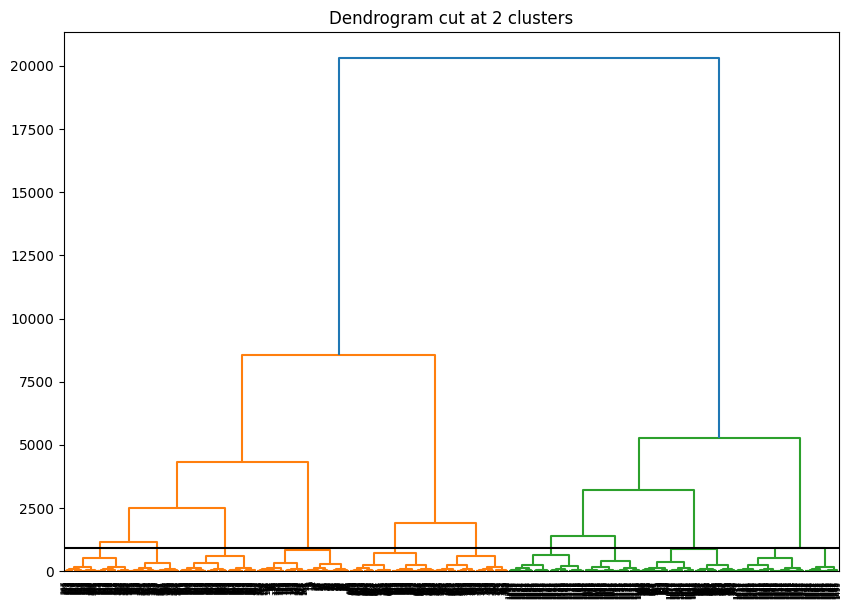

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data1, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.axhline(y=silhouette_scores[optimal_clusters-2]*len(data1), c='k')  # Using the silhouette score to approximate the height for cutting
plt.title(f"Dendrogram cut at {optimal_clusters} clusters")
plt.show()


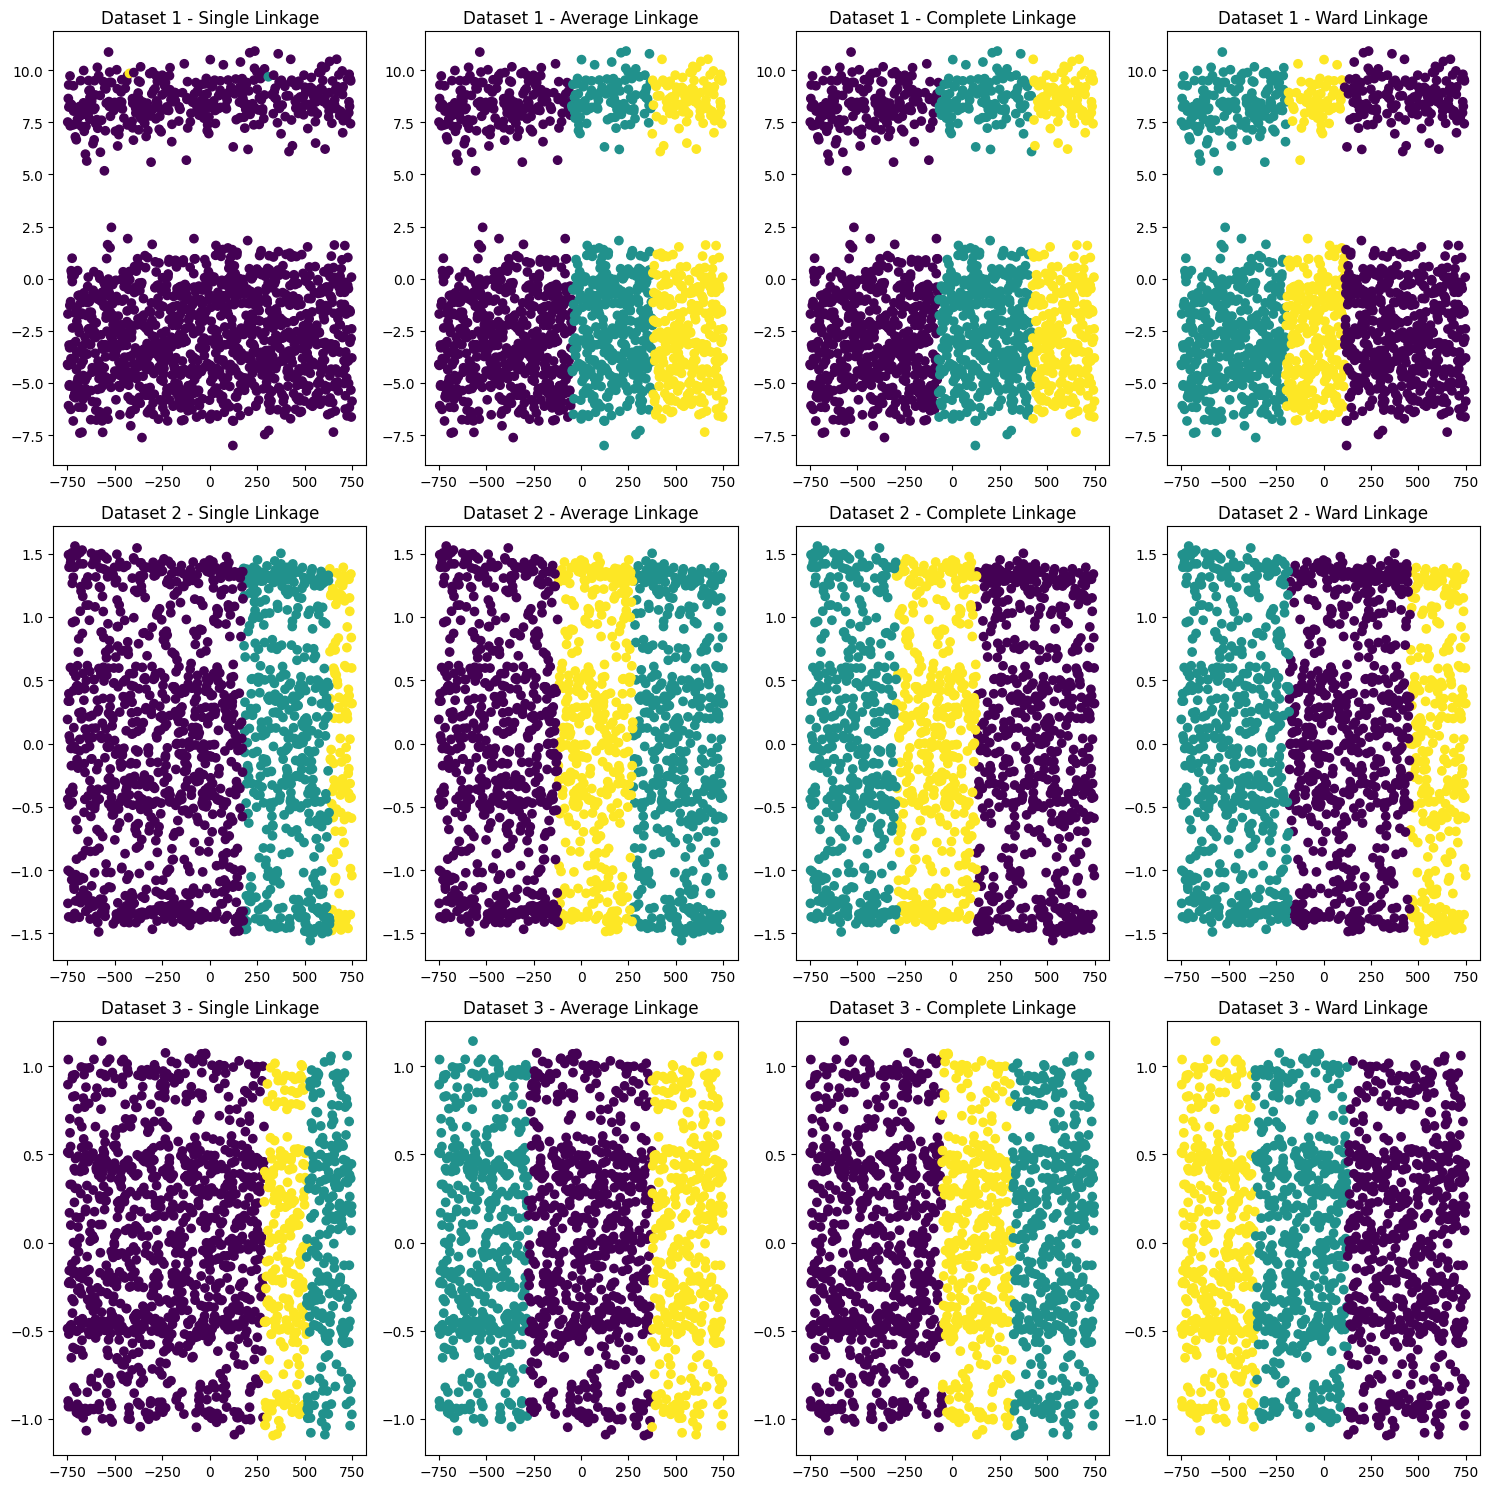

In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

data2 = pd.read_csv('/Users/alexanderdelriscomorales/Downloads/AI_ML_Files/cluster/dataset2.csv')
data3 = pd.read_csv('/Users/alexanderdelriscomorales/Downloads/AI_ML_Files/cluster/dataset3.csv')
datasets = [data1, data2, data3]
linkage_methods = ['single', 'average', 'complete', 'ward']

fig, axes = plt.subplots(nrows=len(datasets), ncols=len(linkage_methods), figsize=(15, 15))

for i, data in enumerate(datasets):
    for j, link in enumerate(linkage_methods):
        
        # Apply Agglomerative Clustering
        cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage=link)
        cluster_labels = cluster.fit_predict(data)
        
        # Use PCA for visualization (optional if data is not 2D)
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(data)
        
        # Plot the clusters
        axes[i, j].scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels)
        axes[i, j].set_title(f'Dataset {i+1} - {link.capitalize()} Linkage')
        
plt.tight_layout()
plt.show()


In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# For Dataset 1 with 'single' linkage method as an example
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
cluster_labels1_single = cluster.fit_predict(data1)

# Silhouette Coefficient
sil_score1_single = silhouette_score(data1, cluster_labels1_single)
print(f"Silhouette Coefficient for Dataset 1 with Single Linkage: {sil_score1_single}")

# Davies-Bouldin Index
db_score1_single = davies_bouldin_score(data1, cluster_labels1_single)
print(f"Davies-Bouldin Index for Dataset 1 with Single Linkage: {db_score1_single}")

# Calinski-Harabasz Index
ch_score1_single = calinski_harabasz_score(data1, cluster_labels1_single)
print(f"Calinski-Harabasz Index for Dataset 1 with Single Linkage: {ch_score1_single}")


Silhouette Coefficient for Dataset 1 with Single Linkage: -0.6081414796678895
Davies-Bouldin Index for Dataset 1 with Single Linkage: 1.1055628082047149
Calinski-Harabasz Index for Dataset 1 with Single Linkage: 0.7317598531858418


In [27]:
# For Dataset 2 with 'single' linkage method as an example
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
cluster_labels1_single = cluster.fit_predict(data2)

# Silhouette Coefficient
sil_score1_single = silhouette_score(data2, cluster_labels1_single)
print(f"Silhouette Coefficient for Dataset 2 with Single Linkage: {sil_score1_single}")

# Davies-Bouldin Index
db_score1_single = davies_bouldin_score(data2, cluster_labels1_single)
print(f"Davies-Bouldin Index for Dataset 2 with Single Linkage: {db_score1_single}")

# Calinski-Harabasz Index
ch_score1_single = calinski_harabasz_score(data2, cluster_labels1_single)
print(f"Calinski-Harabasz Index for Dataset 2 with Single Linkage: {ch_score1_single}")

Silhouette Coefficient for Dataset 2 with Single Linkage: 0.45412951126464624
Davies-Bouldin Index for Dataset 2 with Single Linkage: 0.5001525680699795
Calinski-Harabasz Index for Dataset 2 with Single Linkage: 2082.1224566550145


In [28]:
# For Dataset 3 with 'single' linkage method as an example
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
cluster_labels1_single = cluster.fit_predict(data3)

# Silhouette Coefficient
sil_score1_single = silhouette_score(data3, cluster_labels1_single)
print(f"Silhouette Coefficient for Dataset 3 with Single Linkage: {sil_score1_single}")

# Davies-Bouldin Index
db_score1_single = davies_bouldin_score(data3, cluster_labels1_single)
print(f"Davies-Bouldin Index for Dataset 3 with Single Linkage: {db_score1_single}")

# Calinski-Harabasz Index
ch_score1_single = calinski_harabasz_score(data3, cluster_labels1_single)
print(f"Calinski-Harabasz Index for Dataset 3 with Single Linkage: {ch_score1_single}")

Silhouette Coefficient for Dataset 3 with Single Linkage: 0.41264764351844846
Davies-Bouldin Index for Dataset 3 with Single Linkage: 0.5000988672827633
Calinski-Harabasz Index for Dataset 3 with Single Linkage: 1473.2918613140257


# Clustering metrics

**Silhouette Coefficient:**
Values range between -1 and 1.
A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
Dataset 1 with Single Linkage:
The value -0.608 suggests that the data points in this clustering might be incorrectly clustered or the clusters are overlapping.

Dataset 2 with Single Linkage:
The value 0.454 is closer to 0.5, suggesting that the clusters are somewhat dense and well separated.

Dataset 3 with Single Linkage:
A value of 0.413 also indicates decently separated clusters, but not as well as Dataset 2.

**Davies-Bouldin Index:**
Lower values are better.
Zero is the lowest possible score, and a lower value indicates better partitioning.
Dataset 1 with Single Linkage:
The value 1.106 is a bit high, supporting the earlier conclusion from the Silhouette Coefficient that the clusters might be overlapping or incorrectly clustered.

Dataset 2 with Single Linkage:
A value of 0.500 indicates relatively well-partitioned clusters.

Dataset 3 with Single Linkage:
A value of 0.500 again suggests good partitioning, similar to Dataset 2.

**Calinski-Harabasz Index:**
Higher values are better.
It's the ratio of the sum of between-clusters dispersion and of within-cluster dispersion.
Dataset 1 with Single Linkage:
A low value of 0.732 indicates that the clusters aren't well-defined.

Dataset 2 with Single Linkage:
The value 2082.122 suggests well-separated and dense clusters.

Dataset 3 with Single Linkage:
A value of 1473.292 is also high and indicates that the clusters are relatively dense and well-separated, though not as well-defined as in Dataset 2.


Based on the metrics, Dataset 1 seems to have overlapping or less well-defined clusters when using single linkage. On the other hand, Datasets 2 and 3 have better clustering quality with Dataset 2 being the best among the three in terms of cluster separation and density, as per the metrics given.